In [1]:
# load the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# read the dataset
data = pd.read_csv('diamonds.csv')
# data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diamonds.gsheet')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# print information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
# used for calculating some statistical data like percentile, and mean of the numerical values of the DataFrame
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# drop the first column which is used for numbering the rows and is not useful for the model
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# drop duplicates rows
list = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
data.drop_duplicates(subset=list, keep='first', inplace=True)
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [8]:
# print the number of missing data in every column
missing = pd.DataFrame({'missing': data.isnull().sum()})
missing

,missing
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [9]:
# changed the categorical string data of cut column into numeric
le = LabelEncoder()
cut = le.fit_transform(data['cut'])
data.drop('cut', axis=1, inplace=True)
data['cut'] = cut

In [10]:
# changed the categorical string data of color column into numeric
color = le.fit_transform(data['color'])
data.drop('color', axis=1, inplace=True)
data['color'] = color

In [11]:
# changed the categorical string data of clarity column into numeric
clarity = le.fit_transform(data['clarity'])
data.drop('clarity', axis=1, inplace=True)
data['clarity'] = clarity

In [12]:
data.corr()

,carat,depth,table,price,x,y,z,cut,color,clarity
carat,1.000000,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542,0.017785,0.291019,-0.214068
depth,0.027861,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757,-0.193184,0.047572,-0.053165
table,0.181091,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270,0.150366,0.026102,-0.088074
price,0.921548,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208,0.040196,0.171825,-0.071218
x,0.975380,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686,0.022592,0.269876,-0.225575
y,0.951908,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844,0.027805,0.263153,-0.217459
z,0.953542,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000,0.002442,0.267825,-0.224117
cut,0.017785,-0.193184,0.150366,0.040196,0.022592,0.027805,0.002442,1.000000,0.000393,0.028141
color,0.291019,0.047572,0.026102,0.171825,0.269876,0.263153,0.267825,0.000393,1.000000,-0.028002
clarity,-0.214068,-0.053165,-0.088074,-0.071218,-0.225575,-0.217459,-0.224117,0.028141,-0.028002,1.000000


In [13]:
# drop the label column and store it in target, and create a new data frame with no label
attributes = data.drop('price', axis = 1)
target = data['price']

In [14]:
attributes.describe()

,carat,depth,table,x,y,z,cut,color,clarity
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,5.731214,5.734653,3.538714,2.553947,2.593914,3.835762
std,0.47339,1.429909,2.233679,1.120695,1.141209,0.705037,1.027569,1.701117,1.724872
min,0.20000,43.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,4.710000,4.720000,2.910000,2.000000,1.000000,2.000000
50%,0.70000,61.800000,57.000000,5.700000,5.710000,3.530000,2.000000,3.000000,4.000000
75%,1.04000,62.500000,59.000000,6.540000,6.540000,4.030000,3.000000,4.000000,5.000000
max,5.01000,79.000000,95.000000,10.740000,58.900000,31.800000,4.000000,6.000000,7.000000


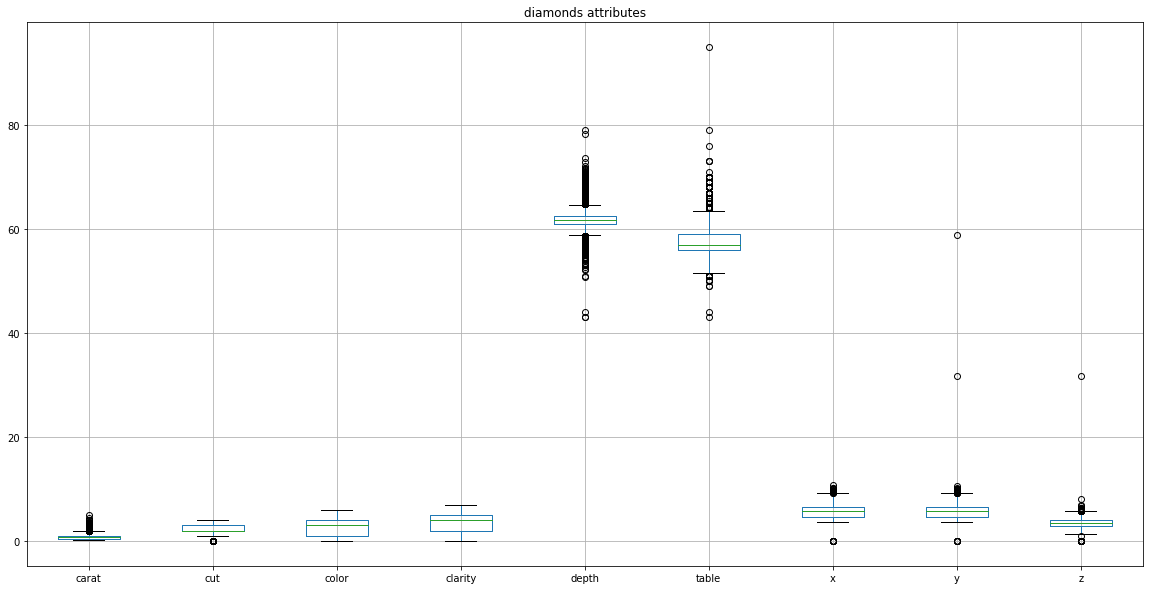

In [15]:
atts = list = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
plt.figure(figsize=(20,10))
attributes[atts].boxplot()
plt.title('diamonds attributes')
plt.show()

In [16]:
attributes.corr()

,carat,depth,table,x,y,z,cut,color,clarity
carat,1.000000,0.027861,0.181091,0.975380,0.951908,0.953542,0.017785,0.291019,-0.214068
depth,0.027861,1.000000,-0.297669,-0.025348,-0.029389,0.094757,-0.193184,0.047572,-0.053165
table,0.181091,-0.297669,1.000000,0.194855,0.183231,0.150270,0.150366,0.026102,-0.088074
x,0.975380,-0.025348,0.194855,1.000000,0.974592,0.970686,0.022592,0.269876,-0.225575
y,0.951908,-0.029389,0.183231,0.974592,1.000000,0.951844,0.027805,0.263153,-0.217459
z,0.953542,0.094757,0.150270,0.970686,0.951844,1.000000,0.002442,0.267825,-0.224117
cut,0.017785,-0.193184,0.150366,0.022592,0.027805,0.002442,1.000000,0.000393,0.028141
color,0.291019,0.047572,0.026102,0.269876,0.263153,0.267825,0.000393,1.000000,-0.028002
clarity,-0.214068,-0.053165,-0.088074,-0.225575,-0.217459,-0.224117,0.028141,-0.028002,1.000000


In [17]:
attributes.head()

,carat,depth,table,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,3.95,3.98,2.43,2,1,3
1,0.21,59.8,61.0,3.89,3.84,2.31,3,1,2
2,0.23,56.9,65.0,4.05,4.07,2.31,1,1,4
3,0.29,62.4,58.0,4.20,4.23,2.63,3,5,5
4,0.31,63.3,58.0,4.34,4.35,2.75,1,6,3


In [18]:
# Model 1
# specify and bulid the model

MLPRegressor.n_outputs_=1
MLPRegressor.n_layers_=1
model1 = MLPRegressor(solver='lbfgs', activation='identity', alpha=1e-5, hidden_layer_sizes=(1, 1),
                      random_state=1, learning_rate_init=0.001, max_iter=800)

In [19]:
# split the data into traing and test data
X_train1, X_test1, y_train1, y_test1 = train_test_split(attributes, target, test_size=0.3)

In [20]:
# train the model
model1.fit(X_train1, y_train1)

MLPRegressor(activation='identity', alpha=1e-05, hidden_layer_sizes=(1, 1),
             max_iter=800, random_state=1, solver='lbfgs')

In [21]:
# test the model
y_pred1 = model1.predict(X_test1)

In [22]:
print("Mean squared error for model 1: ", metrics.mean_squared_error(y_test1, y_pred1))

Mean squared error for model 1:  1826626.9687074705


In [23]:
# Model 2
# specify and bulid the model

MLPRegressor.n_outputs_=1
MLPRegressor.n_layers_=9
model2 = MLPRegressor(solver='adam', activation='relu', alpha=1e-5, hidden_layer_sizes=(100, 2),
                      random_state=1, learning_rate_init=0.001, max_iter= 1500)

In [24]:
# split the data into traing and test data
X_train2, X_test2, y_train2, y_test2 = train_test_split(attributes, target, test_size=0.3)

In [25]:
# train the model
model2.fit(X_train2, y_train2)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(100, 2), max_iter=1500,
             random_state=1)

In [26]:
# test the model
y_pred2 = model2.predict(X_test2)

In [27]:
print("Mean squared error for model 2: ", metrics.mean_squared_error(y_test2, y_pred2))

Mean squared error for model 2:  558542.7968620801


In [28]:
# Model 3
# specify and bulid the model

MLPRegressor.n_outputs_=1
MLPRegressor.n_layers_=5
model3 = MLPRegressor(solver='sgd', activation='logistic', alpha=1e-5, hidden_layer_sizes=(30, 5),
                      random_state=1, learning_rate_init=0.001, max_iter= 2000)

In [29]:
# split the data into traing and test data
X_train3, X_test3, y_train3, y_test3 = train_test_split(attributes, target, test_size=0.3)

In [30]:
# train the model
model3.fit(X_train3, y_train3)

MLPRegressor(activation='logistic', alpha=1e-05, hidden_layer_sizes=(30, 5),
             max_iter=2000, random_state=1, solver='sgd')

In [31]:
# test the model
y_pred3 = model3.predict(X_test3)

In [32]:
print("Mean squared error for model 3: ", metrics.mean_squared_error(y_test3, y_pred3))

Mean squared error for model 3:  16072171.487760758


In [33]:
print("Evaluation for the predicted models")
print("Mean squared error for model 1: ", metrics.mean_squared_error(y_test1, y_pred1))
print("Mean squared error for model 2: ", metrics.mean_squared_error(y_test2, y_pred2))
print("Mean squared error for model 3: ", metrics.mean_squared_error(y_test3, y_pred3))

Evaluation for the predicted models
Mean squared error for model 1:  1826626.9687074705
Mean squared error for model 2:  558542.7968620801
Mean squared error for model 3:  16072171.487760758


In [ ]:
# so the best model among the above is model 2, I even get a better MSE in other runs with a value 493228.0599333643